In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('beer_consumption.csv').dropna()
data.head(10)

,Date,Median temperature,Minimum temperature,Maximum temperature,Precipitation,Weekend,Beer consumed (litres)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
5,2015-01-06,"23,78","20,1","30,5","12,2",0.0,28.218
6,2015-01-07,24,"19,5","33,7",0,0.0,29.732
7,2015-01-08,"24,9","19,5","32,8","48,6",0.0,28.397
8,2015-01-09,"28,2","21,9",34,"4,4",0.0,24.886
9,2015-01-10,"26,76","22,1","34,2",0,1.0,37.937


In [3]:
for index, row in data.iterrows():
    data.loc[index, 'Median temperature'] = float((row['Median temperature'].replace(',', '.')))
    data.loc[index, 'Minimum temperature'] = float((row['Minimum temperature'].replace(',', '.')))
    data.loc[index, 'Maximum temperature'] = float((row['Maximum temperature'].replace(',', '.')))
    data.loc[index, 'Precipitation'] = float((row['Precipitation'].replace(',', '.')))
#     data.loc[index, 'Weekend'] = float((row['Weekend'].replace(',', '.')))

In [4]:
data.head(10)

,Date,Median temperature,Minimum temperature,Maximum temperature,Precipitation,Weekend,Beer consumed (litres)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900
5,2015-01-06,23.78,20.1,30.5,12.2,0.0,28.218
6,2015-01-07,24,19.5,33.7,0,0.0,29.732
7,2015-01-08,24.9,19.5,32.8,48.6,0.0,28.397
8,2015-01-09,28.2,21.9,34,4.4,0.0,24.886
9,2015-01-10,26.76,22.1,34.2,0,1.0,37.937


In [5]:
median_temp = data['Median temperature'].values
beers = data['Beer consumed (litres)'].values

##### Data plotting.

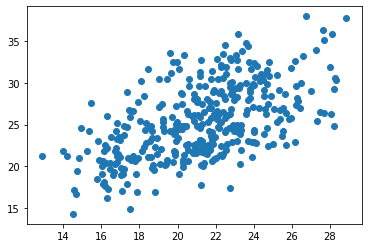

In [6]:
plt.scatter(median_temp, beers)

##### Gradient descent single variable calculation.

In [7]:
def gradient_descent_single(X, y, alpha, epochs, reg_lambda):
    theta0 = 0
    theta1 = 0
    m = len(y)
    losses = []
    
    for i in range(epochs):
        h = theta1 * X + theta0
        d_theta1 = (-2 / m) * sum(X * (y -  h))
        d_theta0 = (-2 / m) * sum(y - h)
        theta1 = theta1 - alpha * d_theta1
        theta0 = theta0 - alpha * d_theta0
        
        loss = loss_function_single(theta0, theta1, X, y, reg_lambda)
        losses.append(loss)
    
    return losses, theta0, theta1

##### Loss function calculation.

In [8]:
def loss_function_single(theta0, theta1, X, y, reg_lambda):
    m = len(y)
    h = theta0 + X.dot(theta1)
    J = (1/2 * m) * (sum(np.square(h - y))) #+ reg_lambda * (theta1 ** 2))
    
    return J

##### Feature normalization.

In [9]:
X = median_temp
X = (X - X.min()) / (X.max() - X.min())
y = beers
y = (y - y.min()) / (y.max() - y.min())

In [10]:
losses, theta0, theta1 = gradient_descent_single(X, y, 0.001, 10000, 10)

In [11]:
theta0, theta1

(0.28633078343900276, 0.3553704915906842)

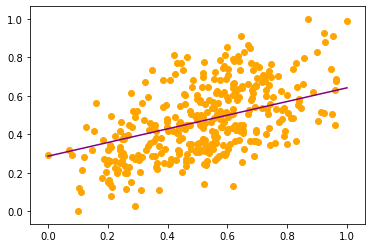

In [12]:
h = theta1 * X + theta0
plt.scatter(X, y, c='orange')
plt.plot([min(X), max(X)], [min(h), max(h)], c='purple')

##### Loss function plotting for single variable gradient descent.

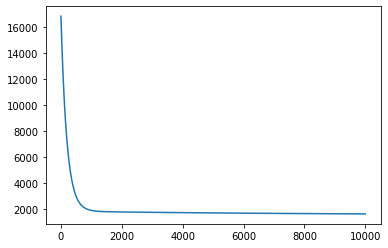

In [13]:
n_iterations = [x for x in range(10000)]
plt.plot(n_iterations, losses)

In [14]:
def hypothesis(theta, X, features):
    h = np.ones((X.shape[0], 1))
    theta = theta.reshape(1, features + 1)
    for i in range(X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [15]:
def gradient_descent(theta, alpha, epochs, h, X, y, features):
    loss = np.ones(epochs)
    for i in range(epochs):
        theta[0] = theta[0] - (alpha / X.shape[0]) * sum(h - y)
        for j in range(1, features + 1):
            theta[j] = theta[j] - (alpha / X.shape[0]) * sum((h - y) * X.transpose()[j])
        h = hypothesis(theta, X, features)
        loss[i] = (1 / (2 * X.shape[0])) * sum(np.square(h - y))
    theta = theta.reshape(1, features + 1)
    return theta, loss

In [16]:
def linear_regression(X, y, alpha, epochs):
    features = X.shape[1]
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
    theta = np.zeros(features + 1)
    h = hypothesis(theta, X, features)
    theta, loss = gradient_descent(theta, alpha, epochs, h, X, y, features)
    return theta, loss

In [17]:
X = data.drop(['Beer consumed (litres)', 'Date'], axis=1).values
X = (X - X.min()) / (X.max() - X.min())
y = data['Beer consumed (litres)'].values

In [18]:
X.shape

(365, 5)

In [19]:
y.shape

(365,)

##### Multivariate gradient descent and weights + loss printing.

In [20]:
theta, loss = linear_regression(X, y, 0.001, 5000)
print ('Theta : {}\nLoss : {}'.format(theta, loss[-1]))

Theta : [[21.55636351  5.17334068  4.16837529  6.59393378  0.5657393   0.11824323]]
Loss : 8.376058905291083


In [21]:
n_iterations = [x for x in range(5000)]

##### Multivariate linear regression loss function plotting.

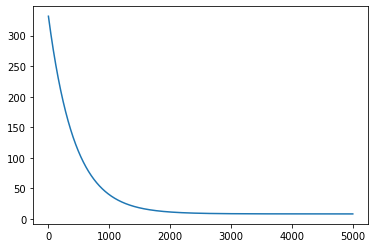

In [22]:
plt.plot(n_iterations, loss)

In [23]:
def matrix_multiplication(M, N):
    W = np.zeros((len(M), len(N[0])))
    for i in range(len(M)):
        for j in range(len(N[0])):
            for k in range(len(N)):
                W[i][j] += M[i][k] * N[k][j]
    return W

In [24]:
def transpose(M):
    N=[]
    for j in range(len(M[0])):
        U=[]
        for i in range(len(M)):
            U.append(M[i][j])
        N.append(U)
    return N

In [25]:
def dot(M,v):
    u=[]
    for i in range(len(M)):
        val=0.0
        for j in range(len(M[0])):
            val=val+M[i][j]*v[j]
        u.append(val)
    return u

##### Normal equation function.

In [26]:
def normal_equation(X, y):
    XT = transpose(X)
    XXT = matrix_multiplication(XT, X)
    Xi = np.linalg.inv(XXT)
    XTy = dot(XT, y)
    theta = dot(Xi, XTy)
    return theta

In [27]:
m = len(X)
bias = (np.ones(m))[:, np.newaxis]
X = np.concatenate((bias, X), axis=1)
X.shape

(365, 6)

In [28]:
normal_equation(X, y)

[6.444696360571417,
 2.9194217538442766,
 -1.8045098924260188,
 62.18887187154707,
 -5.4480973390801,
 491.36553347362224]